# EDA del dataset recipe review
En esta EDA, nuestro objetivo es explorar un conjunto de datos de revisiones de recetas para obtener información sobre los comportamientos de los usuarios y las características de la receta. Limpiaremos los datos, manejaremos los valores que faltan y visualizaremos tendencias que podrían ser relevantes para nuestro análisis posterior, especialmente para construir un sistema de recomendación.

### 1. Carga del dataset y librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sns.set_theme(style="ticks")

In [4]:
df = pd.read_csv('data/RecipeReviews/recipeReviewsUserFeedback.csv')
print(f'{len(df)} registros')

18182 registros


Observamos la misma receta, subida por diferentes usuarios, con sus respectivas valoraciones


#### 1. Descripcion del dataset

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


### 2. Valores nulos


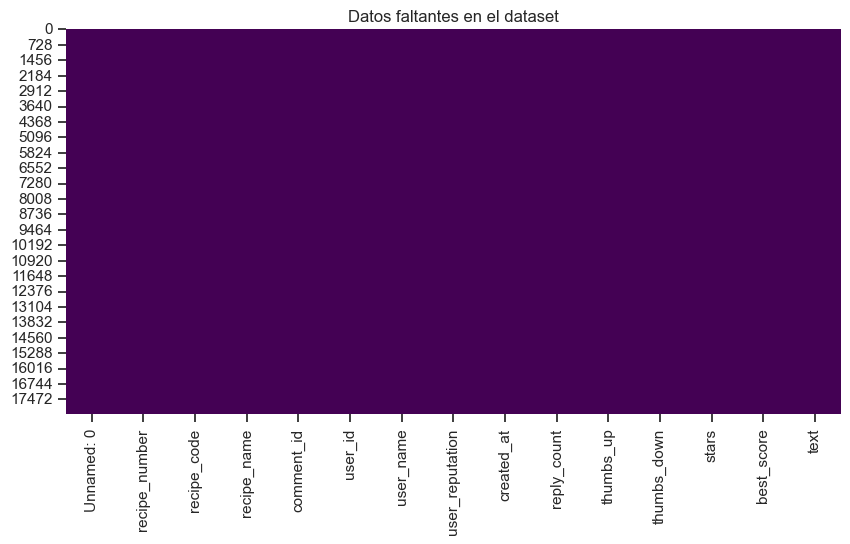

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64
registros nulos: 2


In [6]:
def show_missing_data(df):
    plt.figure(figsize=(10,5))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Datos faltantes en el dataset')
    plt.show()

show_missing_data(df)
print(df.isnull().sum())
print(f'registros nulos: {df.isnull().sum().sum()}')

Faltan 2 registros en text. 

In [7]:
df[df['text'].isnull()]

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
1507,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN
2722,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,NaN


Ya que `text` es la variable que almacena el texto de la receta. Y los registros `1507` y `2722` no cuentan con receta, seran excluidos del analisis.

In [8]:
df.dropna(subset=['text'], inplace=True) # pal gulag

In [9]:
#show_missing_data(df)
print(f'El numero de registros nulos es: {df.isnull().sum().sum()}')

El numero de registros nulos es: 0


Duplicados

In [31]:
# print(f'El numero de registros duplicados es: {df.duplicated().sum()}') hay listas en las columnas

def df_list_to_str(df):
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].apply(str)
    return df

df = df_list_to_str(df)
print(f'Registros duplicados: {df.duplicated().sum()}')


Registros duplicados: 0


Sin datos faltantes

## 2. Distribucion de variables numericas

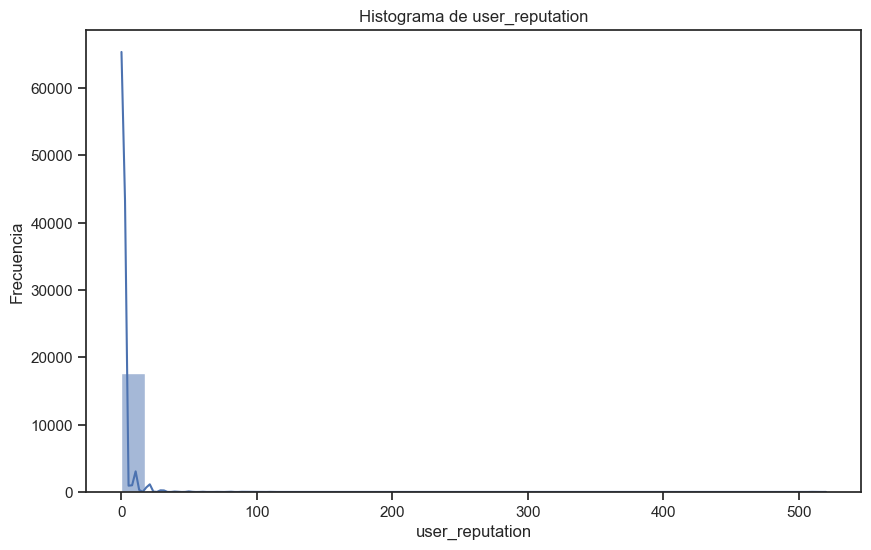

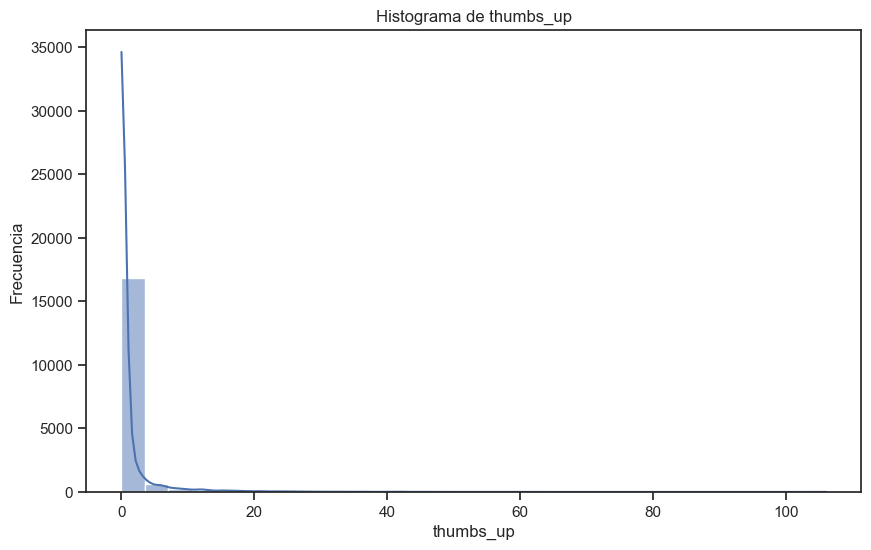

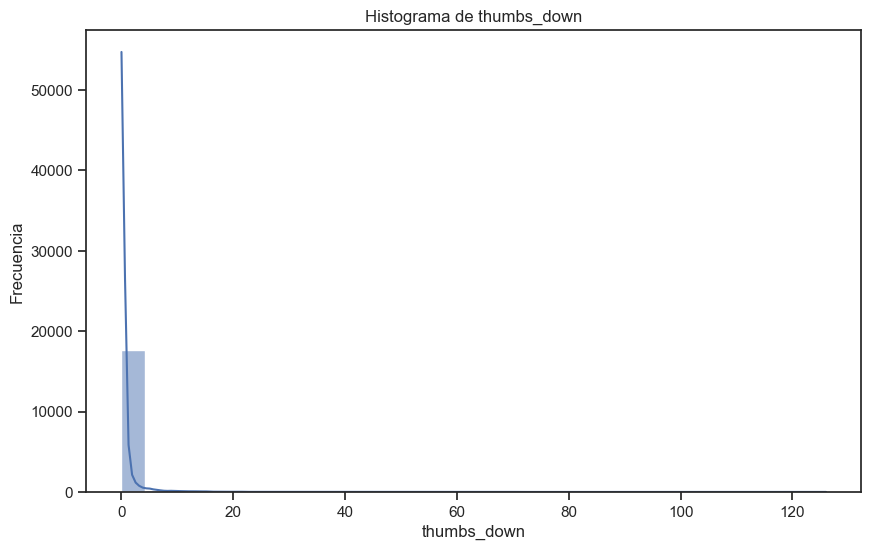

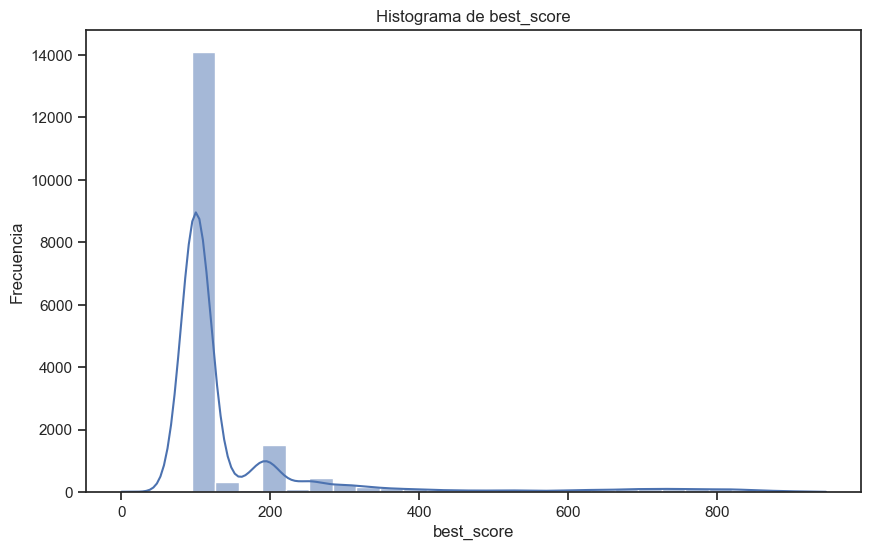

In [11]:
# Crear una lista de las columnas a visualizar
columns = ['user_reputation', 'thumbs_up', 'thumbs_down', 'best_score']

# Crear histogramas para cada columna
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

C:\Users\rodyv\AppData\Local\Temp\ipykernel_22332\780920181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['stars'], palette='viridis')


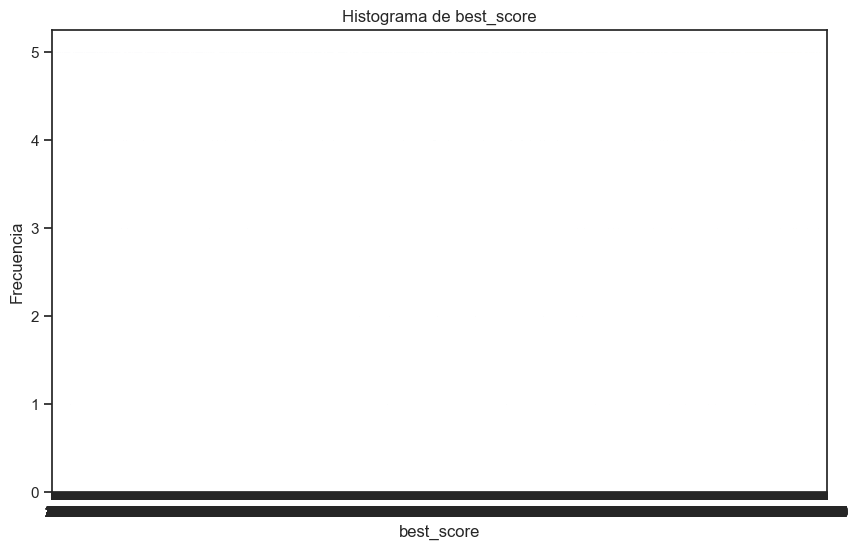

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(df['stars'], palette='viridis')
plt.title(f'Histograma de {column}')
plt.xlabel(column)
plt.ylabel('Frecuencia')
plt.show()

Observamos posibles outliders en todas las variable a excepcion de stars. 
1. Ademas observamos que el conjunto de datos de stars se encuentra sesgado hacia criticas positivas, con calificaciones de 4 y 5 estrellas en dominancia. 
2. Al respecto de los thumbs, las cuentas de aprobacion y desaprobacion varian ampliamente, pero observamos acumulaciones en los datos bajos.

Para mejorar la visualizacion, repetiremos el analisis, usando escala logaritmica

Se aprecia un poco mejor, pero sera necesario usar herramientas estadisticas diferentes a histogramas, un diagrama de cajas podria ser util

## 3.Distribución de las Variables Categóricas:

C:\Users\rodyv\AppData\Local\Temp\ipykernel_22332\2973993134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(recipe_counts[:recipe_sample], palette='viridis')


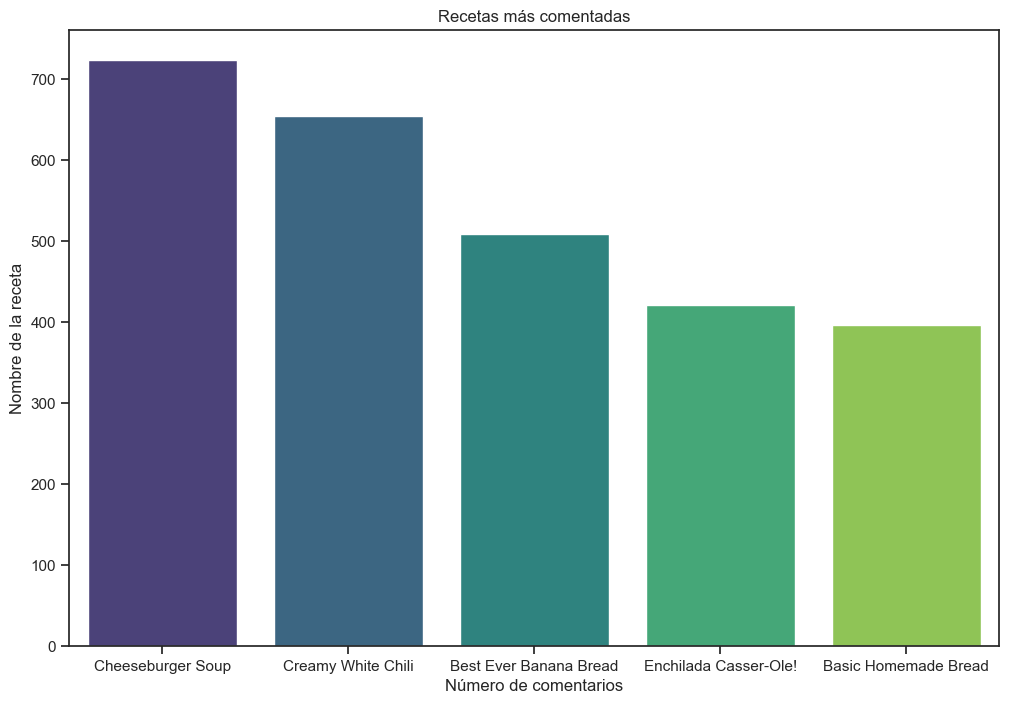

C:\Users\rodyv\AppData\Local\Temp\ipykernel_22332\2973993134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(user_counts[:user_sample], palette='viridis')


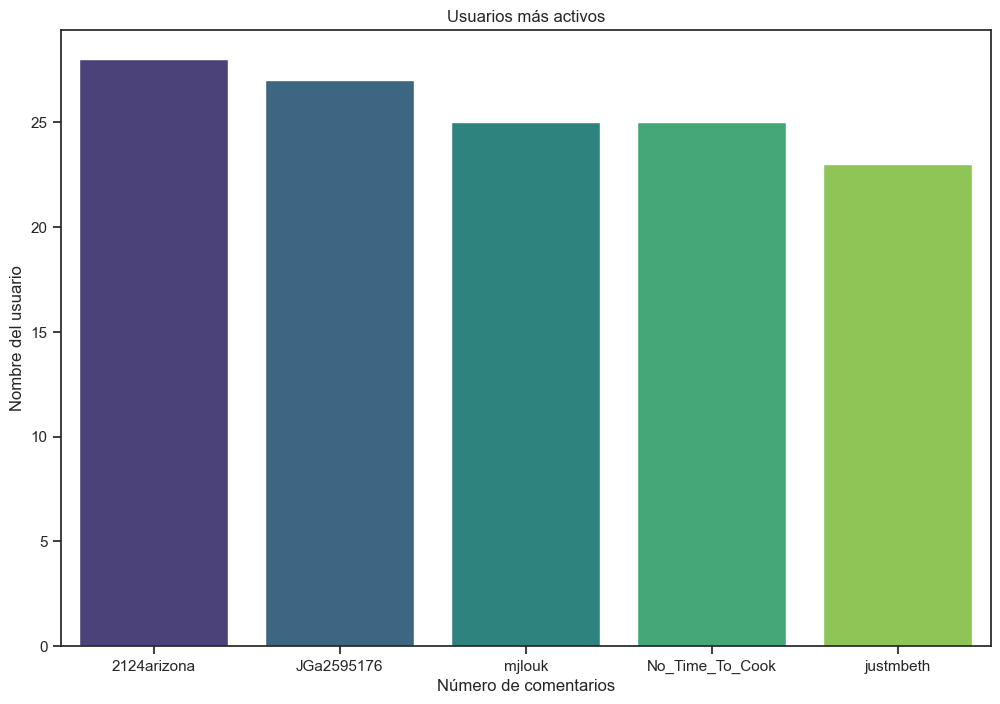

In [13]:
recipe_counts = df['recipe_name'].value_counts()

# Contar las ocurrencias de cada usuario
user_counts = df['user_name'].value_counts()


recipe_sample = 5
user_sample = 5

plt.figure(figsize=(12, 8))
sns.barplot(recipe_counts[:recipe_sample], palette='viridis')
plt.title('Recetas más comentadas')
plt.xlabel('Número de comentarios')
plt.ylabel('Nombre de la receta')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(user_counts[:user_sample], palette='viridis')
plt.title('Usuarios más activos')
plt.xlabel('Número de comentarios')
plt.ylabel('Nombre del usuario')
plt.show()

1. La receta que genera mayor interaccion tiene mas de 700 comentarios y es la Sopa de Hamburgesa 
2. 2124arizona es el usuario que mas ha comentado con mas de 25 comentarios

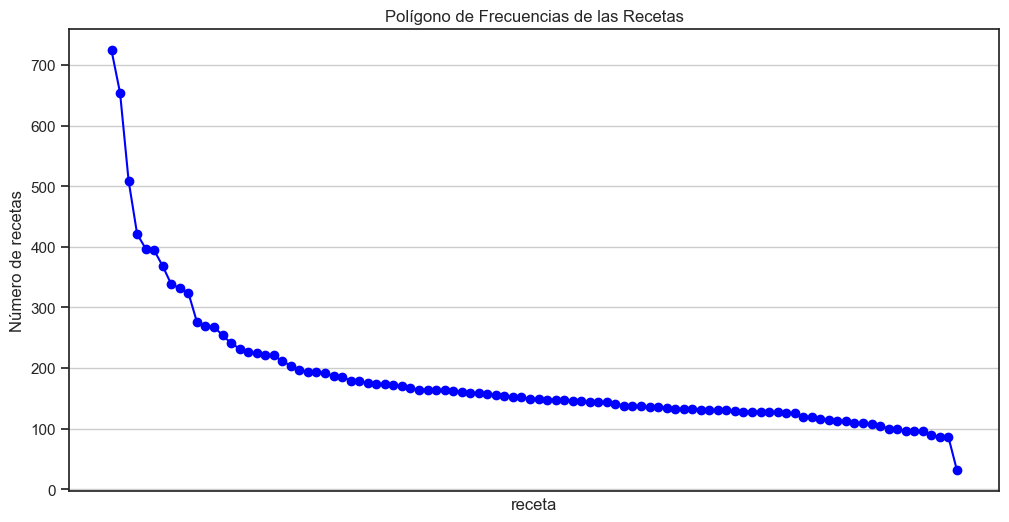

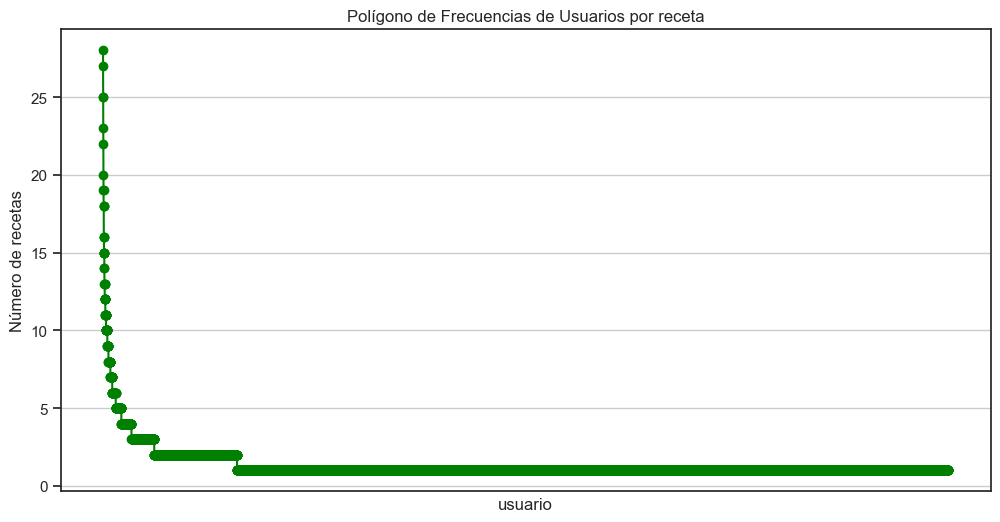

In [14]:
# Contar las ocurrencias de cada receta
recipe_counts = df['recipe_name'].value_counts()

# Contar las ocurrencias de cada usuario
user_counts = df['user_name'].value_counts()

plt.figure(figsize=(12, 6))
plt.plot(recipe_counts.index, recipe_counts.values, marker='o', linestyle='-', color='blue')
plt.xticks([])  
plt.title('Polígono de Frecuencias de las Recetas')
plt.xlabel('receta')
plt.ylabel('Número de recetas')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(user_counts.index, user_counts.values, marker='o', linestyle='-', color='green')
plt.xticks([])  # Ocultar las etiquetas del eje x
plt.title('Polígono de Frecuencias de Usuarios por receta')
plt.xlabel('usuario')
plt.ylabel('Número de recetas')
plt.grid(True)
plt.show()

1. La mayoria de comentarios oscilan entre 100 y 200 recetas.
2. La mayoria de usuarios realizan menos de 5 recetas.

Relacion entre las variables

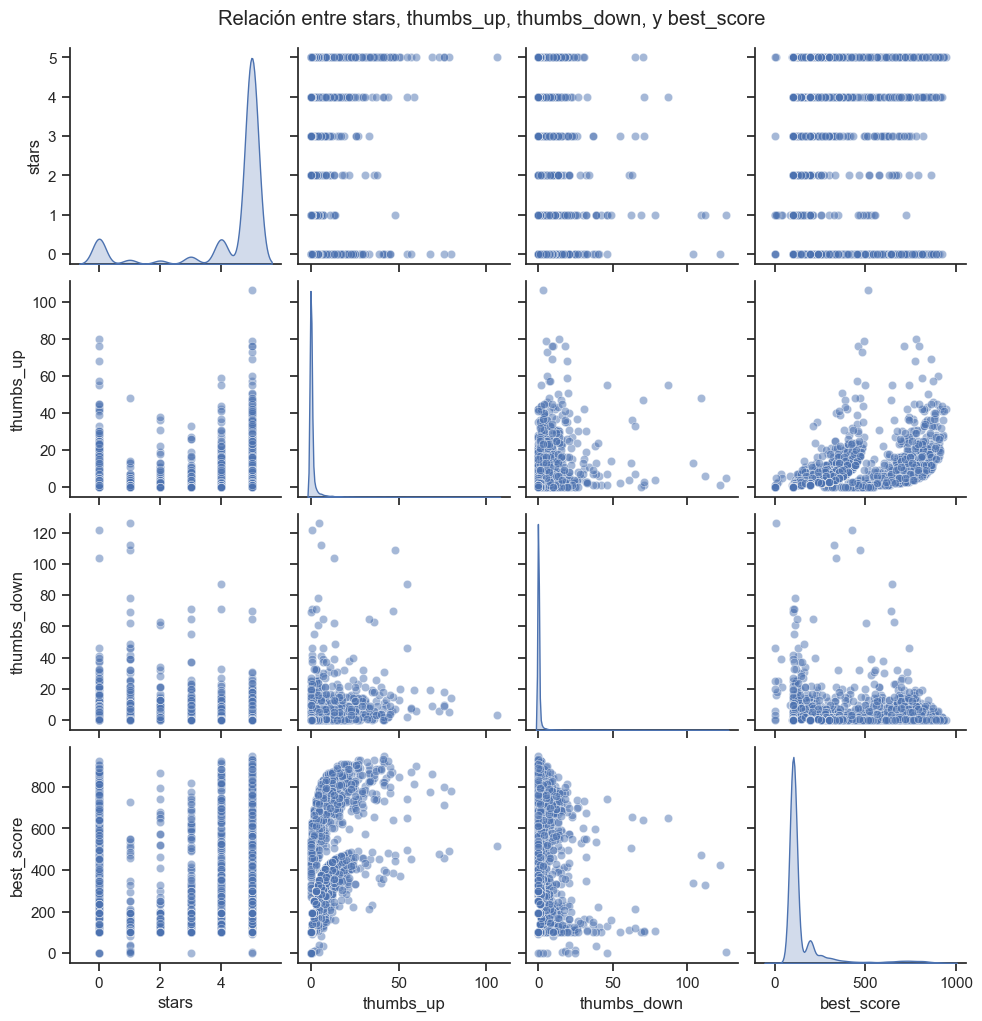

In [15]:
columns_of_interest = ['stars', 'thumbs_up', 'thumbs_down', 'best_score']

sns.pairplot(df[columns_of_interest], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Relación entre stars, thumbs_up, thumbs_down, y best_score', y=1.02)
plt.show()

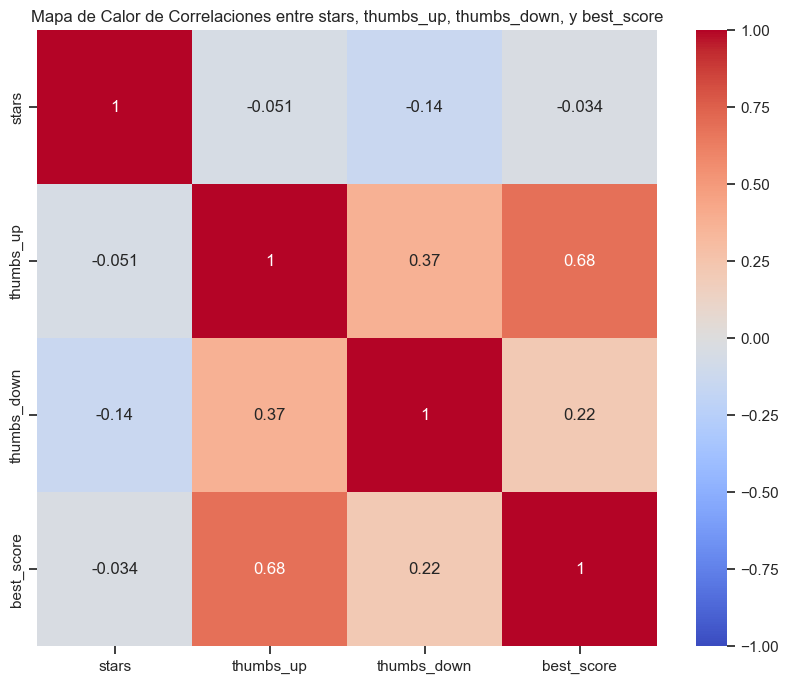

In [16]:
correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones entre stars, thumbs_up, thumbs_down, y best_score')
plt.show()

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodyv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodyv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Definir stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar y tokenizar texto
def clean_and_tokenize(text):
    # Tokenizar
    tokens = word_tokenize(text.lower())
    # Eliminar stopwords y palabras no alfabéticas
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Aplicar la función a la columna 'text'
df['cleaned_tokens'] = df['text'].apply(clean_and_tokenize)

In [19]:
all_tokens = [token for tokens in df['cleaned_tokens'] for token in tokens]

word_freq = Counter(all_tokens)

# Mostrar las 10 palabras más comunes
common_words = word_freq.most_common(10)
print(common_words)

[('recipe', 9793), ('made', 6077), ('make', 5921), ('used', 4245), ('good', 3627), ('time', 3144), ('delicious', 3119), ('great', 2999), ('easy', 2824), ('added', 2807)]


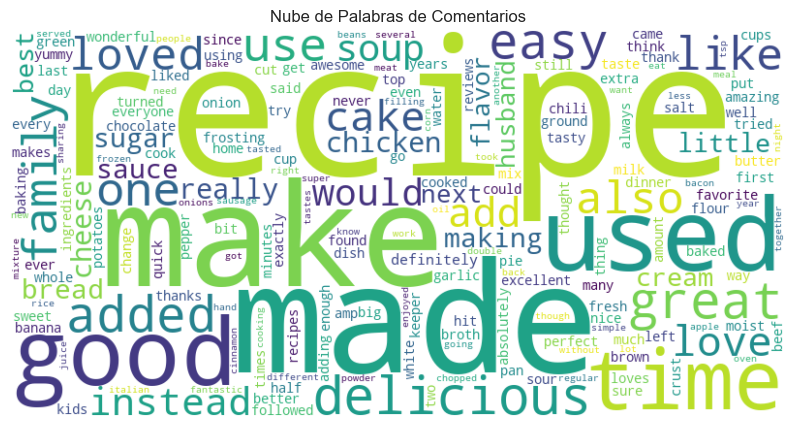

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras del cuerpo de la receta')
plt.show()